### CNN 실습 

####  MNIST DATASET 98% 이상 달성하기

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [38]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [40]:
x_train,x_test=x_train/255.0,x_test/255.0

In [42]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape(28,28)),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')  
])

NameError: name 'input_shape' is not defined

In [43]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=["accuracy"])
model.summary()
hists=model.fit(x_train,y_train,
               validation_data=(x_test,y_test),
               verbose=2,batch_size=100,epochs=15,
               use_multiprocessing=True)
model.evaluate(x_test,y_test,verbose=2,batch_size=100,use_multiprocessing=True)

NameError: name 'model' is not defined

NameError: name 'hist' is not defined

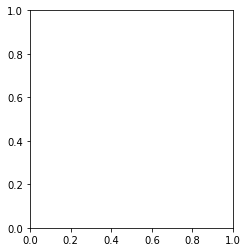

In [15]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.title("cost graph")
plt.ylabel("cost")
plt.title("Accuracy Graph")
plt.ylabel("accuracy")
plt.plot(hist.history['accuracy'],'b-',label="training accuracy")
plt.plot(hist.history['val_accuracy'],'r:',label="val_accuracy")
plt.legend()
plt.tight_layout()
plt.show()

image.shape= (1, 3, 3, 1)
image.reshaped.shape = [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
image.reshaped:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


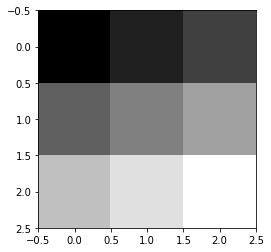

In [44]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

image=np.array([[[[1],[2],[3]],
                [[4],[5],[6]],
                [[7],[8],[9]]]],dtype = np.float32)
print('image.shape=',image.shape)
print('image.reshaped.shape = ',image.reshape(3,3),sep='')
print('image.reshaped:\n',image.reshape(3,3),sep='')
plt.imshow(image.reshape(3,3),cmap='gray')

In [45]:
#Filter 정의
weight=tf.constant([[[[1.0]],[[1.0]]],
                    [[[1.0]],[[1.0]]]])
print('weight.shape = ',weight.shape)
weight_init=tf.constant_initializer(weight.numpy())
weight_img=tf.reshape(weight,(2,2))
print('weight.reshaped.shape= ',weight_img.shape)
print('weight.reshaped:\n',weight_img.numpy(),sep='')

weight.shape =  (2, 2, 1, 1)
weight.reshaped.shape=  (2, 2)
weight.reshaped:
[[1. 1.]
 [1. 1.]]


In [52]:
#필터 적용
print("padding='VALID'")
conv2d=tf.keras.layers.Conv2D(filters=1,kernel_size=2,padding='VALID',
                             kernel_initializer=weight_init)(image)
conv2d_img=conv2d.numpy()
print('conv2d_img.shape= ',conv2d_img.shape)
print('conv2d_img:\n',conv2d_img,sep='')
print('conv2d-img.reshaped,shape= ',conv2d_img.reshape(2,2).shape)
print('conv2d_img.reshaped:\n',conv2d_img.reshape(2,2),sep='')

padding='VALID'
conv2d_img.shape=  (1, 2, 2, 1)
conv2d_img:
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
conv2d-img.reshaped,shape=  (2, 2)
conv2d_img.reshaped:
[[12. 16.]
 [24. 28.]]


In [51]:
print("padding='SAME'")
conv2d=tf.keras.layers.Conv2D(filters=1,kernel_size=2,padding='SAME',
                             kernel_initializer=weight_init)(image)
conv2d_img=conv2d.numpy()
print('conv2d_img.shape= ',conv2d_img.shape)
print('conv2d_img:\n',conv2d_img,sep='')
print('conv2d_img.reshaped.shape= ',conv2d_img.reshape(3,3).shape)
print('conv2d_img.reshaped:\n',conv2d_img.reshape(3,3),sep='')

padding='SAME'
conv2d_img.shape=  (1, 3, 3, 1)
conv2d_img:
[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]
conv2d_img.reshaped.shape=  (3, 3)
conv2d_img.reshaped:
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


In [59]:
#Filter 3개 정의
weight=tf.constant([[[[1.0,10.0,-1.0]],[[1.0,10.0,-1.0]]],
                    [[[1.0,10.0,-1.0]],[[1.0,10.0,-1.0]]]])
weight_img=weight.numpy()
print('weight.shape = ',weight.shape) #(2,2,1,3)->row,col,channel,number
weight_init=tf.constant_initializer(weight.numpy())
weight_img=np.swapaxes(weight_img,0,3)
#(row,col,depth,개수)
#필터 총 3개
for i,one_img in enumerate(weight_img):
    print(one_img.reshape(2,2))

weight.shape =  (2, 2, 1, 3)
[[1. 1.]
 [1. 1.]]
[[10. 10.]
 [10. 10.]]
[[-1. -1.]
 [-1. -1.]]


In [60]:
print("padding='SAME'")
conv2d=tf.keras.layers.Conv2D(filters=3,kernel_size=2,padding='SAME',
                             kernel_initializer=weight_init)(image)
conv2d_img=conv2d.numpy()
print('conv2d_img.shape= ',conv2d_img.shape)
conv2d_img=np.swapaxes(conv2d_img,0,3)
for i,one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))

padding='SAME'
conv2d_img.shape=  (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


In [65]:
#Max Pooling
print("padding='SAME'")
pool=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=1,padding='SAME')(image)
pool_img=pool.numpy()
print('pool_img.shape= ',pool_img.shape)
conv2d_img=np.swapaxes(pool_img,0,3)
for i, one_img in enumerate(pool_img):
    print(one_img.reshape(3,3))

padding='SAME'
pool_img.shape=  (1, 3, 3, 1)
[[5. 6. 6.]
 [8. 9. 9.]
 [8. 9. 9.]]


In [66]:
import os
os.environ['TF_CPP_LOG_LEVEL']='3'

import tensorflow as tf
import matplotlib.pyplot as plt


In [67]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

x_train,x_test=x_train/255.0,x_test/255.0

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


In [72]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='same',
                           activation='relu',input_shape=(28,28,1)),
     tf.keras.layers.MaxPooling2D((2,2),padding='same'),
     tf.keras.layers.Dropout(0.3),
    
     tf.keras.layers.Conv2D(64,(3,3),strides=(1,1),padding='same',
                          activation='relu'),
     tf.keras.layers.MaxPooling2D((2,2),padding='same'),
     tf.keras.layers.Dropout(0.3),
    
     tf.keras.layers.Conv2D(128,(3,3),strides=(1,1),padding='same',
                          activation='relu'),
     tf.keras.layers.MaxPooling2D((2,2),padding='same'),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128,activation='relu'),
     tf.keras.layers.Dense(10,activation='softmax')
    
])

In [75]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["accuracy"])
model.summary()

hist=model.fit(x_train,y_train,
              validation_data=(x_test,y_test),
              verbose=2,batch_size=100,epochs=5,use_multiprocessing=True)

model.evaluate(x_test,y_test,verbose=2,batch_size=100,use_multiprocessing=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         7

[0.023034919053316116, 0.9923999905586243]

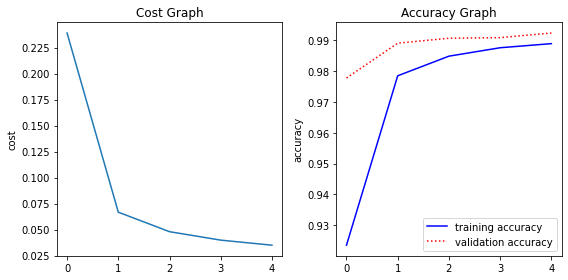

In [76]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.title("Cost Graph")
plt.ylabel("cost")
plt.subplot(1,2,2)
plt.title("Accuracy Graph")
plt.ylabel("accuracy")
plt.plot(hist.history['accuracy'],'b-',label="training accuracy")
plt.plot(hist.history['val_accuracy'],'r:',label="validation accuracy")
plt.legend()
plt.tight_layout()
plt.show()